步骤

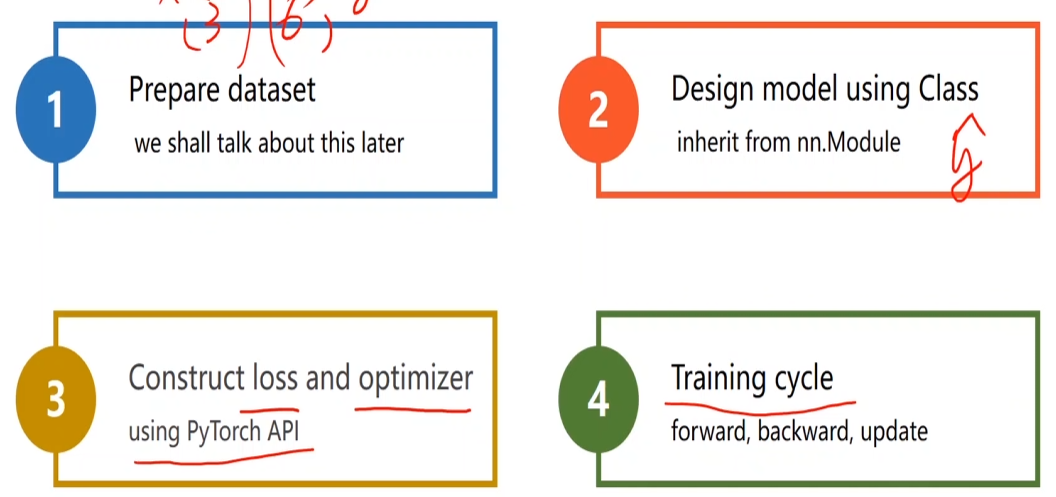

准备数据

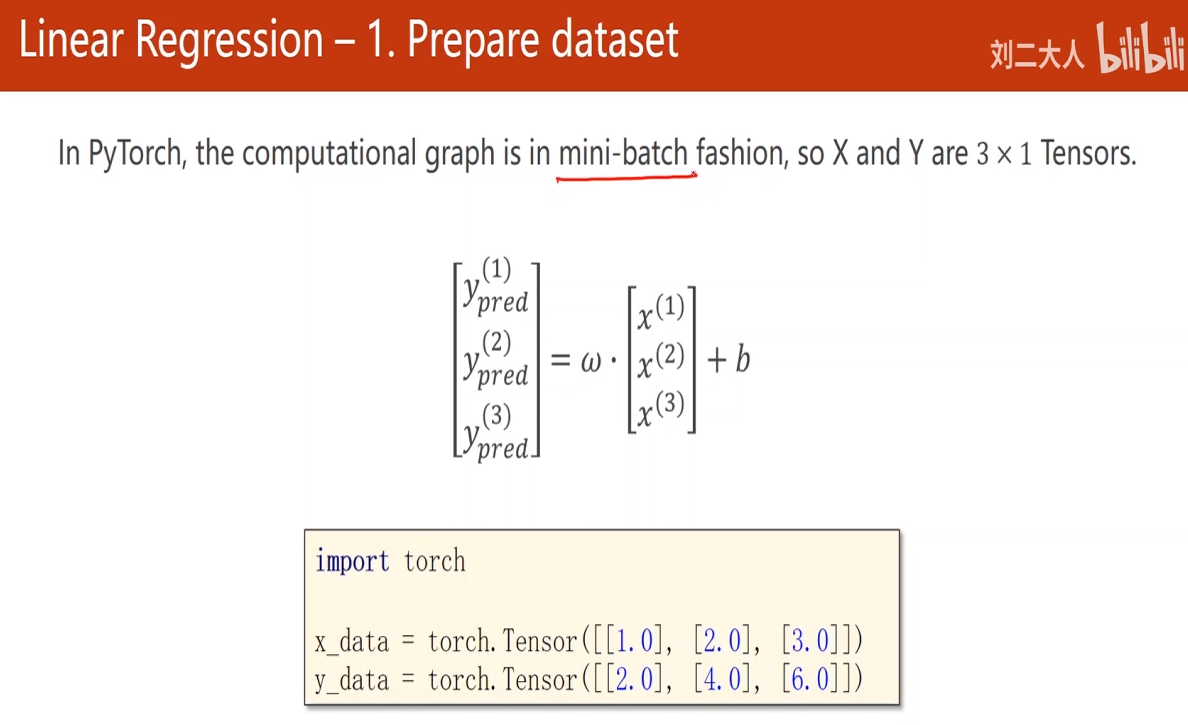

In [68]:
import torch

x_data = torch.Tensor([[1.0], [2.0], [3.0]])
y_data = torch.Tensor([[2.0], [4.0], [6.0]])

设计模型

In [69]:
class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()#调用父类的构造函数，这步必须有
        self.linear = torch.nn.Linear(1, 1)#调用线性层的构造函数
                                            #参数1：输入特征的维度
                                            #参数2：输出特征的维度
                                            #Linear层包含了权重和偏置，自动实现乘以权重加偏置

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

model = LinearModel()

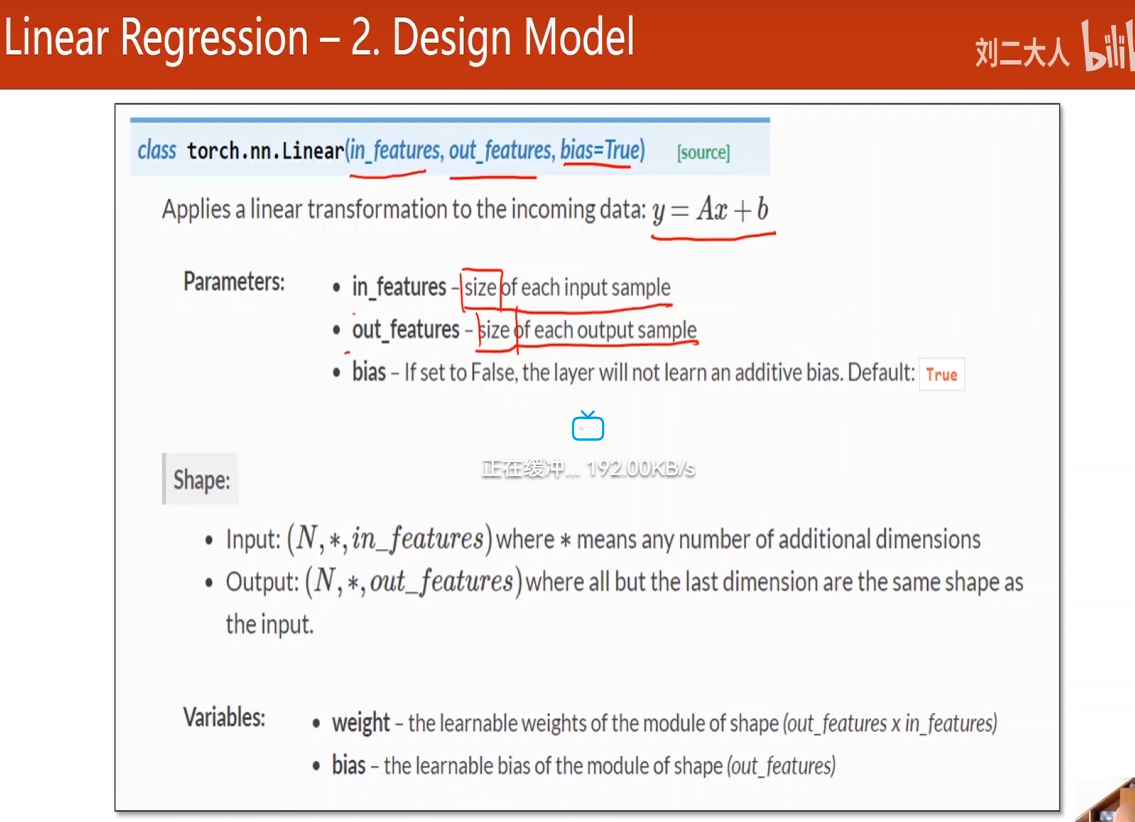

可变参数

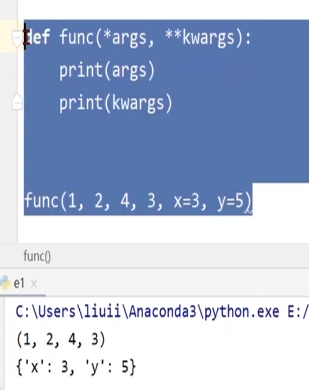

构造损失函数和优化器

In [70]:
criterion = torch.nn.MSELoss(size_average=False)#求均值
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

reduce：是否降维

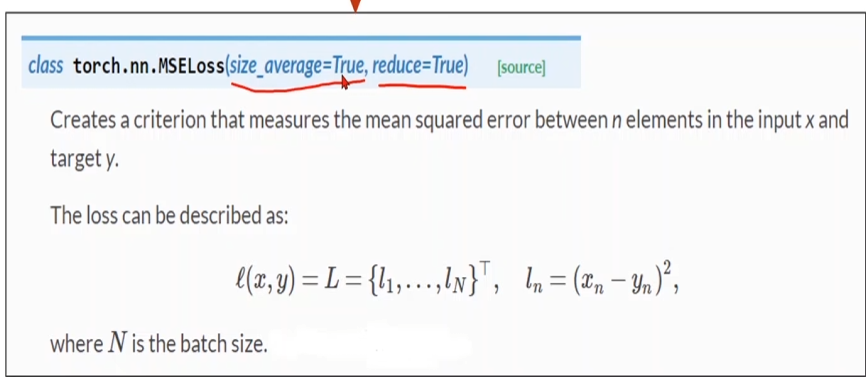

parameters会检查所有权重参数

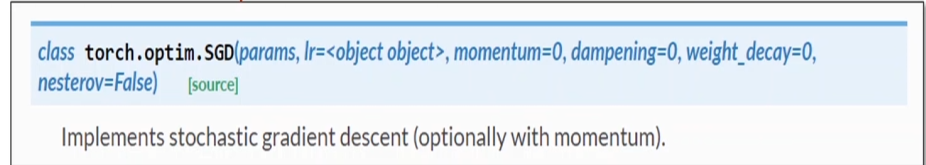

训练过程

In [71]:
# 训练循环
for epoch in range(800):
    y_pred = model(x_data)       # 1. 前向传播

    loss = criterion(y_pred, y_data)  # 2. 计算损失
    print(epoch, loss)          # 3. 打印轮次 + 损失  打印loss时是对象，但不会产生计算图
    
    optimizer.zero_grad()       # 4. 清空梯度
    loss.backward()             # 5. 反向传播
    optimizer.step()            # 6. 更新参数

0 tensor(15.0039, grad_fn=<MseLossBackward0>)
1 tensor(6.9089, grad_fn=<MseLossBackward0>)
2 tensor(3.3019, grad_fn=<MseLossBackward0>)
3 tensor(1.6930, grad_fn=<MseLossBackward0>)
4 tensor(0.9735, grad_fn=<MseLossBackward0>)
5 tensor(0.6501, grad_fn=<MseLossBackward0>)
6 tensor(0.5030, grad_fn=<MseLossBackward0>)
7 tensor(0.4344, grad_fn=<MseLossBackward0>)
8 tensor(0.4009, grad_fn=<MseLossBackward0>)
9 tensor(0.3829, grad_fn=<MseLossBackward0>)
10 tensor(0.3720, grad_fn=<MseLossBackward0>)
11 tensor(0.3643, grad_fn=<MseLossBackward0>)
12 tensor(0.3580, grad_fn=<MseLossBackward0>)
13 tensor(0.3523, grad_fn=<MseLossBackward0>)
14 tensor(0.3471, grad_fn=<MseLossBackward0>)
15 tensor(0.3420, grad_fn=<MseLossBackward0>)
16 tensor(0.3370, grad_fn=<MseLossBackward0>)
17 tensor(0.3322, grad_fn=<MseLossBackward0>)
18 tensor(0.3274, grad_fn=<MseLossBackward0>)
19 tensor(0.3227, grad_fn=<MseLossBackward0>)
20 tensor(0.3180, grad_fn=<MseLossBackward0>)
21 tensor(0.3135, grad_fn=<MseLossBackward0

In [72]:
#查看权重和偏置
print('w = ', model.linear.weight.item())
print('b = ', model.linear.bias.item())

w =  1.9986639022827148
b =  0.0030372177716344595


预测

In [73]:
x_test = torch.Tensor([[7.0]])
y_test = model(x_test)
print('y_pred = ', y_test.data)

y_pred =  tensor([[13.9937]])


其他优化器


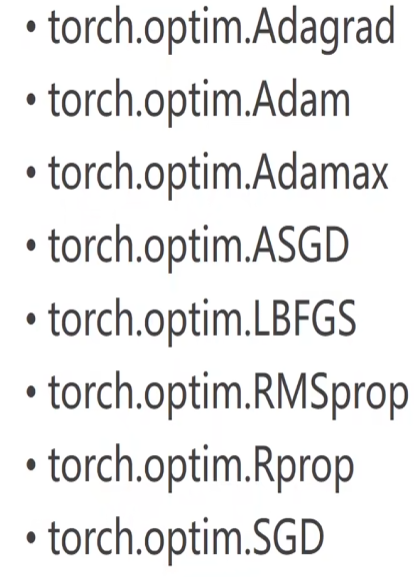